what is NN

https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

First explain what is the concept of RNN from packt book..write that we are going to take a baseline model for the generalization

1. logistic regression (make it as a baseline model)
2. simple rnn
3. lstm https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781788621755/4/ch04lvl1sec37/classification-for-spam-detection

https://towardsdatascience.com/a-practical-guide-to-rnn-and-lstm-in-keras-980f176271bc

4. word embedding with CNN 


for keras plots refer https://www.tensorflow.org/tutorials/keras/text_classification#create_a_plot_of_accuracy_and_loss_over_time


# **RNN**

https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788292061/6

https://builtin.com/data-science/recurrent-neural-networks-and-lstm

# **Simple RNN**
comment on the accuracy to evaluate it

https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788292061/6/ch06lvl1sec41/simple-recurrent-neural-network

https://subscription.packtpub.com/book/big-data-and-business-intelligence/9781787128422/6/ch06lvl1sec40/simplernn-cells

implementation

https://www.kaggle.com/joydeb28/simplernn-achive-good-accuracy

https://www.kaggle.com/sercanyesiloz/imdb-sentiment-analysis-eda-keras-rnn


https://www.youtube.com/watch?v=EN60ZmxmSyA&t=301s for pic


**FOR F1 score use macro-avg score as it is insensitive towards imbalance of the data**

The choice of a metric depends on how you rank the importance of your classes and what you value from a classifier. Let's look at your example:

For example if we have a data set with 90%-10% class distribution then a baseline classifier can achieve 90% accuracy by assigning the majority class label.

One minor correction is that this way you can achieve a 90% micro-averaged accuracy. If your goal is for your classifier simply to maximize its hits and minimize its misses, this would be the way to go.

However, if you valued the minority class the most, you should switch to a macro-averaged accuracy, where you would only get a 50% score. This metric is insensitive to the imbalance of the classes and treats them all as equal.

In many applications the latter is preferable. Imagine a classification problem aiming at diagnosing a disease that appears in 1% of the population. What good is a classifier that would always predict that the patient was healthy, even if it could achieve a 99% micro-averaged accuracy on the task?

The reason why micro-averaging is prevalent is because in most tasks, we would be interested in simply maximizing the number of correct predictions the classifier makes. In these tasks no class is more important than the others.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_style( "whitegrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving skill_labelled_NP_trainingTech.csv to skill_labelled_NP_trainingTech.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'. format(name= fn, length=len(uploaded[fn])))

User uploaded file "skill_labelled_NP_trainingTech.csv" with length 694448 bytes


In [ ]:
import pandas as pd
import numpy as np
import io
from keras.preprocessing.text import Tokenizer

from sklearn.metrics import classification_report


In [ ]:
df= pd.read_csv(io.BytesIO(uploaded['skill_labelled_NP_trainingTech.csv']), usecols=["training_noun_phrases","skill_set_bool"])
df.head()

,training_noun_phrases,skill_set_bool
0,considerable investment,0
1,insight analytics team,0
2,business,0
3,fantastic opportunity,0
4,forefront,0


test file upload

In [ ]:
uploaded = files.upload()

Saving testing_noun_phrases.csv to testing_noun_phrases.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'. format(name= fn, length=len(uploaded[fn])))

User uploaded file "testing_noun_phrases.csv" with length 451349 bytes


In [ ]:
df_test= pd.read_csv(io.BytesIO(uploaded['testing_noun_phrases.csv']), usecols=["Default_index", "testing_noun_phrases"])
df_test.head()

,Default_index,testing_noun_phrases
0,0,leading online retail groceries brand
1,5,datadriven ecommerce business
2,7,technological innovation
3,8,entrepreneurial startup environment
4,9,backing


In [ ]:
# test_data = tokenizer.texts_to_sequences(df_test.testing_noun_phrases)  
# test_data_seq = pad_sequences(test_data,padding='post',maxlen=maxlen)

In [ ]:
df.isna().sum()

training_noun_phrases    0
skill_set_bool           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30890 entries, 0 to 30889
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   training_noun_phrases  30890 non-null  object
 1   skill_set_bool         30890 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 482.8+ KB


In [ ]:
df["skill_set_bool"].value_counts()

0    29823
1     1067
Name: skill_set_bool, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
classes = df.skill_set_bool.unique()
print(classes)

[0 1]


In [ ]:
# counts = []


# for i in classes:
#   count = len(df[df.skill_set_bool==i])
#   counts.append(count)

# plt.bar(['not_job_skill', 'job_skill'], counts)
# plt.show()

https://stackoverflow.com/questions/57205718/how-can-we-be-sure-of-the-efficiency-of-a-neural-network

In [ ]:
sentences = df['training_noun_phrases'].values
y= df['skill_set_bool'].values

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30, random_state=0)

Now you need to tokenize the data into a format that can be used by the word embeddings. Keras offers a couple of convenience methods for text preprocessing and sequence preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves. You can add the parameter num_words, which is responsible for setting the size of the vocabulary. The most common num_words words will be then kept

In [ ]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

word_index = tokenizer.word_index


print(sentences_train[2])
print(X_train[2])

benefit
[37]


In [ ]:
print(vocab_size)

NameError: ignored

One problem that we have is that each text sequence has in most cases different length of words. To counter this, you can use pad_sequence() which simply pads the sequence of words with zeros. By default, it prepends zeros but we want to append them. Typically it does not matter whether you prepend or append zeros.

Additionally you would want to add a maxlen parameter to specify how long the sequences should be. This cuts sequences that exceed that number. In the following code, you can see how to pad sequences with Keras:

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[2191  179  668    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


## **Without sampling- prove overfitting**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
# define model

In [ ]:
# define model
lg = LogisticRegression(random_state=0)
# fit it
lg.fit(X_train,y_train)
# test
y_pred = lg.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9662242365382541
Confusion Matrix: 
[[8954    1]
 [ 312    0]]
Area Under Curve: 0.49994416527079844
Recall score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


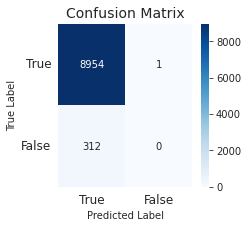

True Positive: 8954
True Negative: 0
False Positive: 1
False Negative: 312


In [ ]:
y_pred = lg.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8955
           1       0.00      0.00      0.00       312

    accuracy                           0.97      9267
   macro avg       0.48      0.50      0.49      9267
weighted avg       0.93      0.97      0.95      9267



**Oversampling with SMOTE**

As the dataset is imbalanced, so SMOTE algorithm has been applied to balance it

For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement

In [ ]:
# plot dictionary before oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# summarize class distribution
print("Before oversampling: ",Counter(y_train))


Before oversampling:  Counter({0: 20868, 1: 755})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After oversampling:  Counter({0: 20868, 1: 20868})


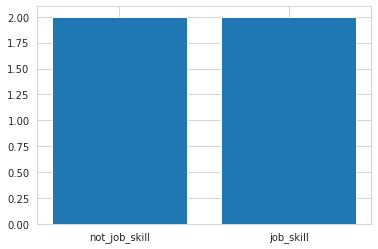

In [ ]:
counts = []


for i in classes:
  count = len(Counter(y_train))
  counts.append(count)

plt.bar(['not_job_skill', 'job_skill'], counts)
plt.show()

In [ ]:
# test_data = tokenizer.texts_to_sequences(df_test.testing_noun_phrases)  
# test_data_seq = pad_sequences(test_data,padding='post',maxlen=maxlen)

In [ ]:
print(X_train[5, :])

[168   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


# **Baseline Model**

https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

# **Logistic Regression**


In [ ]:
# define model
lg2 = LogisticRegression(random_state=0)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.42074026114168556
Confusion Matrix: 
[[3692 5263]
 [ 105  207]]
Area Under Curve: 0.5378725894429411
Recall score: 0.6634615384615384


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


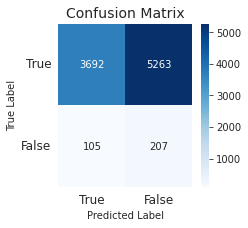

True Positive: 3692
True Negative: 207
False Positive: 5263
False Negative: 105


In [ ]:
y_pred = lg2.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.41      0.58      8955
           1       0.04      0.66      0.07       312

    accuracy                           0.42      9267
   macro avg       0.51      0.54      0.33      9267
weighted avg       0.94      0.42      0.56      9267




**Test data - converting to sequence and padding it- Getting results on entirely new dataset**

In [ ]:
test_data = tokenizer.texts_to_sequences(df_test.testing_noun_phrases)  
test_data_seq = pad_sequences(test_data,padding='post',maxlen=maxlen)

In [ ]:
pred = lg2.predict(test_data_seq)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_logistic.csv', index=False)

### **Multinomial Naïve Bayes (MultinomialNB)**

https://medium.datadriveninvestor.com/improve-the-text-classification-results-with-a-suitable-preprocessing-step-gridsearchcv-and-f19cb3e182a3

https://medium.datadriveninvestor.com/improve-the-text-classification-results-with-a-suitable-preprocessing-step-gridsearchcv-and-f19cb3e182a3

https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

https://medium.com/analytics-vidhya/what-is-naive-bayes-9cb4fe1ba0c3

https://towardsdatascience.com/tuning-parameters-heres-how-39a4d1956f79

https://www.analyticsvidhya.com/blog/2021/08/email-spam-detection-a-comparative-analysis-of-4-machine-learning-models/

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# define model

multinomial_nb = MultinomialNB()
# fit it
multinomial_nb.fit(X_train,y_train)
# test
y_pred = multinomial_nb.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8802201359663322
Confusion Matrix: 
[[8115  840]
 [ 270   42]]
Area Under Curve: 0.520406519778379
Recall score: 0.1346153846153846


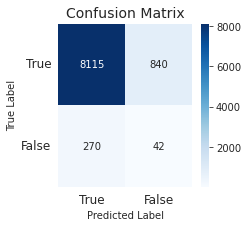

True Positive: 8115
True Negative: 42
False Positive: 840
False Negative: 270


In [ ]:
y_pred = multinomial_nb.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8955
           1       0.05      0.13      0.07       312

    accuracy                           0.88      9267
   macro avg       0.51      0.52      0.50      9267
weighted avg       0.94      0.88      0.91      9267



In [ ]:
pred = multinomial_nb.predict(test_data_seq)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_multinomialnb.csv', index=False)

### **Hyperparameter tuning to improve the performance**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
         }

In [ ]:

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)
y_pred = multinomial_nb.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished


Accuracy Score: 0.8802201359663322
Confusion Matrix: 
[[8115  840]
 [ 270   42]]
Area Under Curve: 0.520406519778379
Recall score: 0.1346153846153846


In [ ]:
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Best Parameters :  {'alpha': 0.01}


In [ ]:
# params = {'alpha': [0.01],
#          }

In [ ]:
# multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# multinomial_nb_grid.fit(X_train,y_train)
# y_pred = multinomial_nb.predict(X_test)

# # performance
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
# print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
# print(f'Recall score: {recall_score(y_test,y_pred)}')

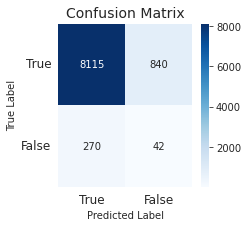

True Positive: 8115
True Negative: 42
False Positive: 840
False Negative: 270


In [ ]:
y_pred = multinomial_nb_grid.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8955
           1       0.05      0.13      0.07       312

    accuracy                           0.88      9267
   macro avg       0.51      0.52      0.50      9267
weighted avg       0.94      0.88      0.91      9267



In [ ]:
pred = multinomial_nb_grid.predict(test_data_seq)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_multinomialnb_tuned.csv', index=False)

With weighted-LG, Area-Under-Curve (AUC) increased from 0.4999 to 0.5159. Recall score imporved from 0.0 to 0.7372. Correct predictions for minority label increased as well. Though model has few wrong prediction in majority class, but custom weights have shown improvement in predicting minority class as expected.

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9652530484514945
Confusion Matrix: 
[[8692  263]
 [  59  253]]
Area Under Curve: 0.8907641841687068
Recall score: 0.8108974358974359


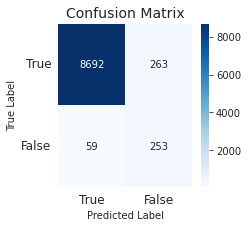

True Positive: 8692
True Negative: 253
False Positive: 263
False Negative: 59


In [ ]:
y_pred = model_rf.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8955
           1       0.49      0.81      0.61       312

    accuracy                           0.97      9267
   macro avg       0.74      0.89      0.80      9267
weighted avg       0.98      0.97      0.97      9267



In [ ]:
pred = model_rf.predict(test_data_seq)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_randomforest.csv', index=False)

### **Hyperparameter tuning to improve the performance**

In [ ]:

# Create a Random Forest Classifier
rf_tuned = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_



In [ ]:
print('Best Parameters RF tuned : ',rf_tuned)

Best Parameters RF tuned :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Train the model using the training sets 
rf_tuned.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9652530484514945
Confusion Matrix: 
[[8692  263]
 [  59  253]]
Area Under Curve: 0.8907641841687068
Recall score: 0.8108974358974359


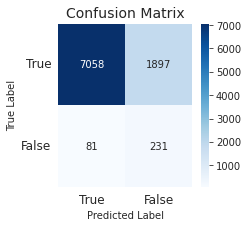

True Positive: 7058
True Negative: 231
False Positive: 1897
False Negative: 81


In [ ]:
y_pred = rf_tuned.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8955
           1       0.11      0.74      0.19       312

    accuracy                           0.79      9267
   macro avg       0.55      0.76      0.53      9267
weighted avg       0.96      0.79      0.85      9267



In [ ]:
pred = rf_tuned.predict(test_data_seq)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_randomforest_tuned.csv', index=False)

# Keras Embedding Layer

https://realpython.com/python-keras-text-classification/#a-primer-on-deep-neural-networks

https://hemantranvir.medium.com/spam-detection-using-rnn-simplernn-lstm-with-step-by-step-explanation-530367608071

Notice that, at this point, our data is still hardcoded. We have not told Keras to learn a new embedding space through successive tasks. Now you can use the Embedding Layer of Keras which takes the previously calculated integers and maps them to a dense vector of the embedding. You will need the following parameters:


1.   input_dim: the size of the vocabulary
2.  output_dim: the size of the dense vector
3. input_length: the length of the sequence

explain about units, activation function,optimizer and loss

https://medium.com/deep-learning-with-keras/which-activation-loss-functions-part-a-e16f5ad6d82a

explain about compile packt book or pakistani guy video

In [ ]:
import tensorflow as tf

text for overfitting



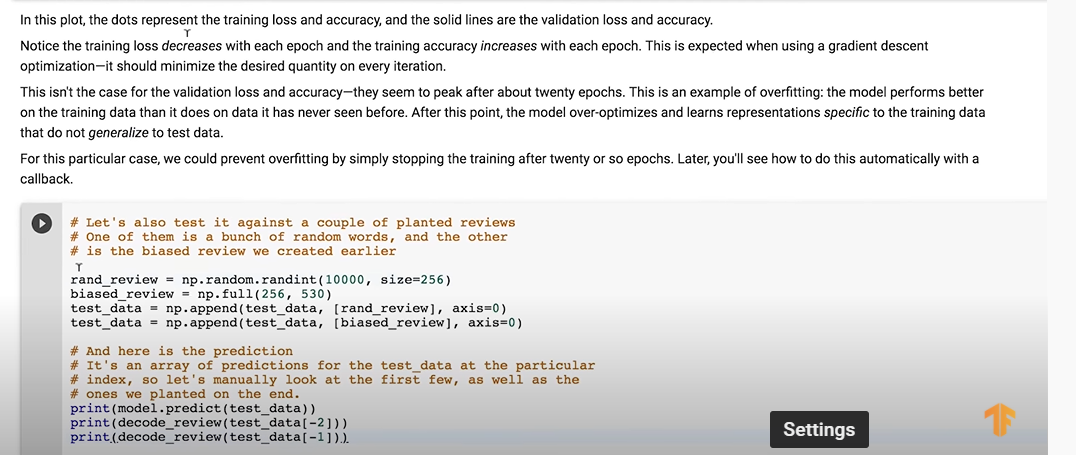

https://www.quora.com/My-testing-accuracy-is-97-and-training-accuracy-is-99-Is-my-model-over-fitting-Why-is-it-performing-so-well-I-have-computed-other-metrics-and-they-are-giving-good-results

https://deeplizard.com/learn/video/DEMmkFC6IGM

https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323 prevent overfitting

https://softwareengineering.stackexchange.com/questions/322619/why-my-neural-network-accuracy-is-100

https://www.kaggle.com/jcy1996/spam-mail-classificatoin-with-rnn smote used on NN

From the accuracy graph, it is evident that our model is overfitting due to following reasons:

1. Both the accuracy of the training and the test data is 100%
2. One of the potential reasons for the overfit of the model can be due to imbalance of the data. The job_skill class is almost one-third of the non_job_skill class. So we need to find a way to overcome overfitting.
3. In the loss plot above we can see clear signs of overfitting as The Train Loss decreases, but the validation loss depicts a fluctuation behaviour as it frequently changes its state until it decreases finally. 

### **Confusion matrix**

https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

https://medium.com/analytics-vidhya/complete-guide-to-machine-learning-evaluation-metrics-615c2864d916

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce     f1score

https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1 very good

From the file, the model works well on the data it was trained before but fails to generalize well on the new data . for example, it fails to predict javascript as a skill related to job. testt

** **Simple RNN model**

https://www.youtube.com/watch?v=GMrTBtzJkCg

https://www.youtube.com/watch?v=vPrSca-YjFg

https://www.youtube.com/watch?v=y8zqS7cfi6o&list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi&index=63 krish naik

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout


embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(SimpleRNN(units=embedding_dim))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
model.summary()


Epoch 1/10
696/696 [==============================] - 115s 159ms/step - loss: 0.4632 - acc: 0.7728 - val_loss: 0.2575 - val_acc: 0.9164
Epoch 2/10
696/696 [==============================] - 110s 158ms/step - loss: 0.3404 - acc: 0.8549 - val_loss: 0.2370 - val_acc: 0.8850
Epoch 3/10
696/696 [==============================] - 110s 159ms/step - loss: 0.2752 - acc: 0.8949 - val_loss: 0.2806 - val_acc: 0.8884
Epoch 4/10
696/696 [==============================] - 111s 160ms/step - loss: 0.2496 - acc: 0.9035 - val_loss: 0.6943 - val_acc: 0.6619
Epoch 5/10
696/696 [==============================] - 111s 160ms/step - loss: 0.2859 - acc: 0.8900 - val_loss: 0.2712 - val_acc: 0.8945
Epoch 6/10
696/696 [==============================] - 111s 159ms/step - loss: 0.2813 - acc: 0.8921 - val_loss: 0.2692 - val_acc: 0.9063
Epoch 7/10
696/696 [==============================] - 111s 160ms/step - loss: 0.2478 - acc: 0.9024 - val_loss: 0.2479 - val_acc: 0.9228
Epoch 8/10
696/696 [============================

In [ ]:
SimpleRNNModel_weight_balance = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 10, batch_size = 60, verbose = 1)

### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**


In [ ]:
score = model.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)


290/290 [==============================] - 4s 14ms/step - loss: 0.4603 - acc: 0.8021
Accuracy: % 80.20934462547302


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1= model.predict(X_test)
y_pred1= np.round(y_pred1).astype(int)

print(roc_auc_score(y_test,y_pred1))

0.8573841429369067


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      8955
           1       0.14      0.92      0.24       312

    accuracy                           0.80      9267
   macro avg       0.57      0.86      0.56      9267
weighted avg       0.97      0.80      0.86      9267



**Accuracy plot**

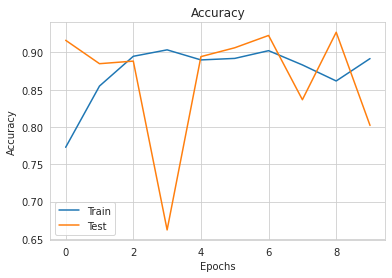

In [ ]:
plt.figure()
plt.plot(SimpleRNNModel_weight_balance.history["acc"], label = "Train")
plt.plot(SimpleRNNModel_weight_balance.history["val_acc"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

**Loss plot**

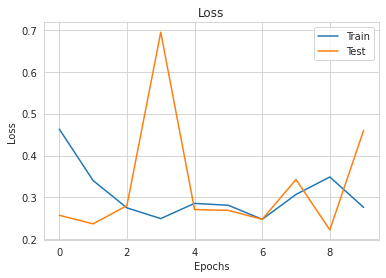

In [ ]:
plt.figure()
plt.plot(SimpleRNNModel_weight_balance.history["loss"], label = "Train")
plt.plot(SimpleRNNModel_weight_balance.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# **Diagram simpleRNN**

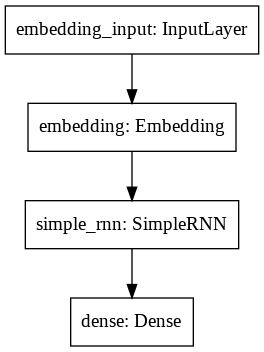

In [ ]:
tf.keras.utils.plot_model(model)

**Confusion metrics**

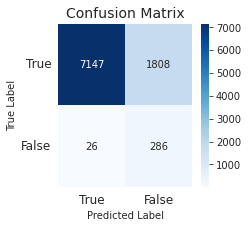

True Positive: 7147
True Negative: 286
False Positive: 1808
False Negative: 26


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
pred = model.predict(test_data_seq, verbose=1)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_simplernn.csv', index=False)

640/640 [==============================] - 8s 12ms/step


<!-- **The model has been imporoved with the accuracy of 90% which was 99% due to overfit but the model still shows the sign of overfitting due to fluctuation of the curve from loss plot.** -->

# **Hyperparameter Tuning**

using drop out layer and Early Stopping callback function

https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788629416/1/ch01lvl1sec09/recurrent-neural-networks-rnns

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

https://elitedatascience.com/overfitting-in-machine-learning#examples

In [ ]:
from tensorflow.python.keras.layers import Input, Dense

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(Dropout(0.4))
model.add(SimpleRNN(units=embedding_dim))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           236850    
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1)                 51        
Total params: 241,951
Trainable params: 241,951
Non-trainable params: 0
_________________________________________________________________


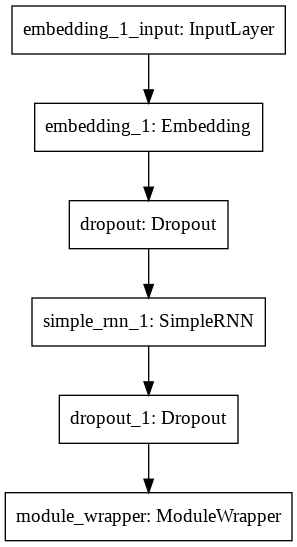

In [ ]:
tf.keras.utils.plot_model(model)

you could prevent overfitting by simply stopping the training when the validation accuracy is no longer increasing. One way to do so is to use the tf.keras.callbacks.EarlyStopping callback.

Another way to prevent overfitting is to stop your training process early: Instead of training for a fixed number of epochs, you stop as soon as the validation loss rises — because, after that, your model will generally only get worse with more training. You can implement early stopping easily with a callback in keras:

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, mode='min')


In [ ]:
SimpleRNNModel_drop = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 20, batch_size = 120, callbacks=[callback], verbose = 1)

Epoch 1/20
348/348 [==============================] - 61s 170ms/step - loss: 0.6583 - acc: 0.5857 - val_loss: 0.3768 - val_acc: 0.9362
Epoch 2/20
348/348 [==============================] - 59s 169ms/step - loss: 0.4917 - acc: 0.7817 - val_loss: 0.2232 - val_acc: 0.9317
Epoch 3/20
348/348 [==============================] - 58s 167ms/step - loss: 0.3696 - acc: 0.8528 - val_loss: 0.7434 - val_acc: 0.5579


### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**


In [ ]:
score = model.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)


290/290 [==============================] - 4s 14ms/step - loss: 0.7434 - acc: 0.5579
Accuracy: % 55.78935742378235


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1= model.predict(X_test)
y_pred1= np.round(y_pred1).astype(int)

print(roc_auc_score(y_test,y_pred1))

0.7495909032341194


In [ ]:
print(y_pred1)

[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      8955
           1       0.07      0.96      0.13       312

    accuracy                           0.56      9267
   macro avg       0.53      0.75      0.42      9267
weighted avg       0.97      0.56      0.68      9267



**Confusion metrics**

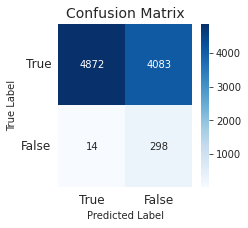

True Positive: 4872
True Negative: 298
False Positive: 4083
False Negative: 14


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### **Accuracy plot**

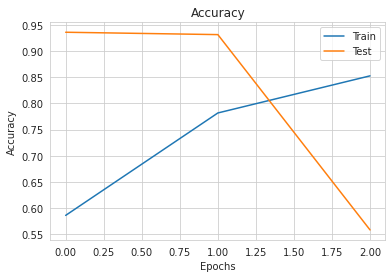

In [ ]:
plt.figure()
plt.plot(SimpleRNNModel_drop.history["acc"], label = "Train")
plt.plot(SimpleRNNModel_drop.history["val_acc"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

**Loss plot**

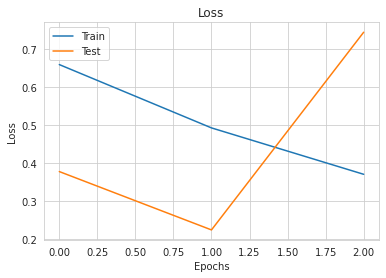

In [ ]:
plt.figure()
plt.plot(SimpleRNNModel_drop.history["loss"], label = "Train")
plt.plot(SimpleRNNModel_drop.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
test_data_snn = tokenizer.texts_to_sequences(df_test.testing_noun_phrases)  
test_data_seqsnn = pad_sequences(test_data_snn,padding='post',maxlen=maxlen)

In [ ]:
pred = model.predict(test_data_seqsnn, verbose=1)
df_test['test_skill_label_snn'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label_snn']].to_csv('submission_simplernn_tuned.csv', index=False)

640/640 [==============================] - 8s 13ms/step


## **LSTM**

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://www.kaggle.com/kentata/rnn-for-spam-detection

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout


embedding_dim = 50

model_lstm = Sequential()
model_lstm.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model_lstm.add(LSTM(units=embedding_dim))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           236850    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 257,101
Trainable params: 257,101
Non-trainable params: 0
_________________________________________________________________


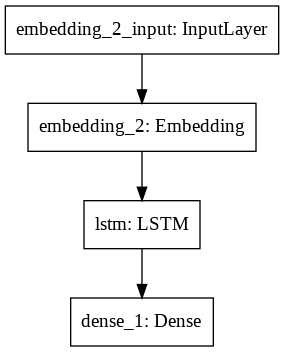

In [ ]:
tf.keras.utils.plot_model(model_lstm)

### **Training LSTM**

In [ ]:
LSTMModelResults = model_lstm.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 60, verbose = 1)

Epoch 1/10
696/696 [==============================] - 501s 715ms/step - loss: 0.6933 - acc: 0.4972 - val_loss: 0.6990 - val_acc: 0.0337
Epoch 2/10
696/696 [==============================] - 495s 712ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6991 - val_acc: 0.0337
Epoch 3/10
696/696 [==============================] - 485s 696ms/step - loss: 0.6932 - acc: 0.4969 - val_loss: 0.6915 - val_acc: 0.9663
Epoch 4/10
696/696 [==============================] - 489s 703ms/step - loss: 0.6932 - acc: 0.4960 - val_loss: 0.6951 - val_acc: 0.0337
Epoch 5/10
696/696 [==============================] - 494s 710ms/step - loss: 0.6932 - acc: 0.4951 - val_loss: 0.6884 - val_acc: 0.9663
Epoch 6/10
696/696 [==============================] - 492s 706ms/step - loss: 0.6932 - acc: 0.4960 - val_loss: 0.6907 - val_acc: 0.9663
Epoch 7/10
696/696 [==============================] - 482s 693ms/step - loss: 0.6932 - acc: 0.4944 - val_loss: 0.6905 - val_acc: 0.9663
Epoch 8/10
696/696 [============================

### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**


In [ ]:
score = model_lstm.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)
 

290/290 [==============================] - 13s 45ms/step - loss: 0.6894 - acc: 0.9663
Accuracy: % 96.63321375846863


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1= model_lstm.predict(X_test)
y_pred1= np.round(y_pred1).astype(int)

print(roc_auc_score(y_test,y_pred1))

0.5


In [ ]:
print(y_pred1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8955
           1       0.00      0.00      0.00       312

    accuracy                           0.97      9267
   macro avg       0.48      0.50      0.49      9267
weighted avg       0.93      0.97      0.95      9267



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Plotting accuracy**

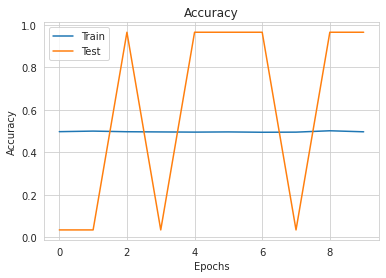

In [ ]:
plt.figure()
plt.plot(LSTMModelResults.history["acc"], label = "Train")
plt.plot(LSTMModelResults.history["val_acc"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### **Loss plot**

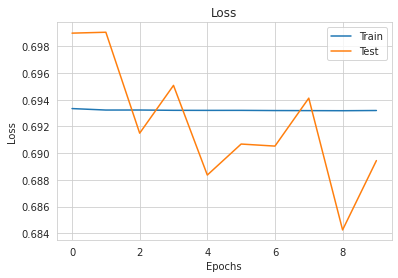

In [ ]:
plt.figure()
plt.plot(LSTMModelResults.history["loss"], label = "Train")
plt.plot(LSTMModelResults.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### **Confusion matrix**

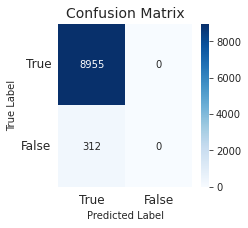

True Positive: 8955
True Negative: 0
False Positive: 0
False Negative: 312


In [ ]:
y_pred = model_lstm.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

In [ ]:
pred = model_lstm.predict(test_data_seq, verbose=1)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_lstm.csv', index=False)

640/640 [==============================] - 27s 42ms/step


In [ ]:
print(y_test)

[0 0 0 ... 0 0 0]


**Limitations**:



Model encountered an error while studying roc_auc_curve
ValueError: Found array with dim 3. Estimator expected <= 2.

https://stackoverflow.com/questions/64351475/recurrent-neural-network-valueerror-found-array-with-dim-3-estimator-expected

>>model.input.shape
TensorShape([None, d1, d2])
>>model.output.shape
TensorShape([None, d1, 1])

So your model expects input of shape (n_batch,d1,d2), where n_batch is the batch size of the data, and returns a shape (n_batch,d1,1), thus a 3d-tensor. write similar to this

Now if you provide a 3d-tensor to your model, the model.prediction-method will succesfully return a 3d-tensor, however sklearn.preprocessing.StandardScaler.inverse_transform only works for 2d-data, thats why it says

On the other hand, if you first reshape your data to be 2d, then model.prediction complains, because it is set up to expect a 3d-tensor. so think adding a flatten layer

what output-shape you want your LSTM-model to have. I assume you actually want your LSTM-model to return a scalar for each sample, so an additional Flatten-layer might do the trick:..imp to get 2d array.


In [ ]:
model_lstm.input.shape

TensorShape([None, 100])

In [ ]:
model_lstm.output.shape

TensorShape([None, 1])

Flattening a tensor means to remove all of the dimensions except for one.

A Flatten layer in Keras reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor.

This is the same thing as making a 1d-array of elements.

https://stackoverflow.com/questions/44176982/how-does-the-flatten-layer-work-in-keras

no need --return sequence=true--let it set to default state of false
https://stackoverflow.com/questions/51376770/rnn-what-is-the-use-of-return-sequences-in-lstm-layer-in-keras-framework

### **Hyperparamter tuning for LSTM model**


include - callback and dropout layer 

In [ ]:
embedding_dim = 50

LSTM_tuned = Sequential()
LSTM_tuned.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
LSTM_tuned.add(Dropout(0.4))
LSTM_tuned.add(LSTM(units=embedding_dim))
LSTM_tuned.add(Dropout(0.4))
LSTM_tuned.add(Dense(1, activation='sigmoid'))
LSTM_tuned.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])

LSTM_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           236850    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 257,101
Trainable params: 257,101
Non-trainable params: 0
_________________________________________________________________


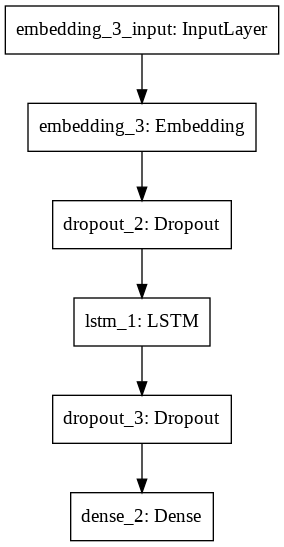

In [ ]:
tf.keras.utils.plot_model(LSTM_tuned)

In [ ]:
callbackLSTM_tuned = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1, mode='min')

In [ ]:
LSTM_tuned_drop = LSTM_tuned.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 10, batch_size = 128, callbacks=[callbackLSTM_tuned], verbose = 1)

Epoch 1/10
327/327 [==============================] - 235s 707ms/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6978 - val_acc: 0.0337
Epoch 2/10
327/327 [==============================] - 231s 705ms/step - loss: 0.6933 - acc: 0.4988 - val_loss: 0.7133 - val_acc: 0.0337


### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**


In [ ]:
score = LSTM_tuned.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)


290/290 [==============================] - 13s 46ms/step - loss: 0.7133 - acc: 0.0337
Accuracy: % 3.3667854964733124


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1= LSTM_tuned.predict(X_test)
y_pred1= np.round(y_pred1).astype(int)

print(roc_auc_score(y_test,y_pred1))

0.5


In [ ]:
print(classification_report(y_test, y_pred1, labels=np.unique(y_pred1)))

              precision    recall  f1-score   support

           1       0.03      1.00      0.07       312

   micro avg       0.03      1.00      0.07       312
   macro avg       0.03      1.00      0.07       312
weighted avg       0.03      1.00      0.07       312



In [ ]:
from sklearn.metrics import plot_confusion_matrix, f1_score
F1 = f1_score(y_test, y_pred1, average = 'binary')
print(F1)


0.06514249921703727


**Confusion Matrics**

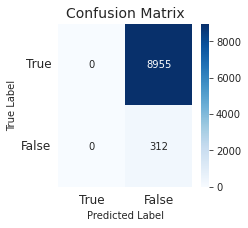

True Positive: 0
True Negative: 312
False Positive: 8955
False Negative: 0


In [ ]:
y_pred = LSTM_tuned.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

**Accuracy plot**

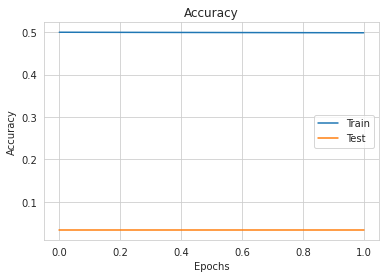

In [ ]:
plt.figure()
plt.plot(LSTM_tuned_drop.history["acc"], label = "Train")
plt.plot(LSTM_tuned_drop.history["val_acc"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

**Loss plot**

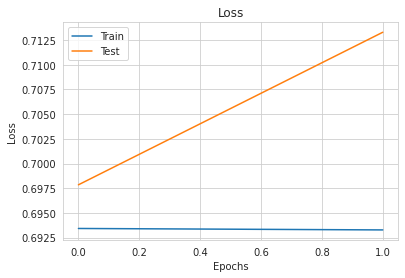

In [ ]:
plt.figure()
plt.plot(LSTM_tuned_drop.history["loss"], label = "Train")
plt.plot(LSTM_tuned_drop.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
pred = LSTM_tuned.predict(test_data_seq, verbose=1)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_lstm_tuned.csv', index=False)

640/640 [==============================] - 27s 42ms/step


# **CNN**

https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9

https://learnremote.medium.com/sentiment-analysis-using-1d-convolutional-neural-networks-part-1-f8b6316489a2

https://stackoverflow.com/questions/46503816/keras-conv1d-layer-parameters-filters-and-kernel-size good explannation

https://datascience.stackexchange.com/questions/89776/conv1d-layer-input-and-output



In [ ]:
embedding_dim = 50
# 5 filters are there
CNN = Sequential()    # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
# CNN.add(layers.Embedding(input_dim=vocab_size, 
#                            output_dim=embedding_dim, 
#                            input_length=maxlen))
# CNN.add(Conv1D(32, 3, padding='same', activation='relu'))
# CNN.add(MaxPooling1D())
# CNN.add(Flatten())
# CNN.add(Dense(250, activation='relu'))
# CNN.add(Dense(1, activation='sigmoid'))

CNN.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
CNN.add(layers.Conv1D(embedding_dim, 5, activation='relu'))
CNN.add(layers.GlobalMaxPooling1D())
CNN.add(layers.Dense(10, activation='relu'))
CNN.add(layers.Dense(1, activation='sigmoid'))
CNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           236850    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 50)            12550     
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 249,921
Trainable params: 249,921
Non-trainable params: 0
_________________________________________________________________


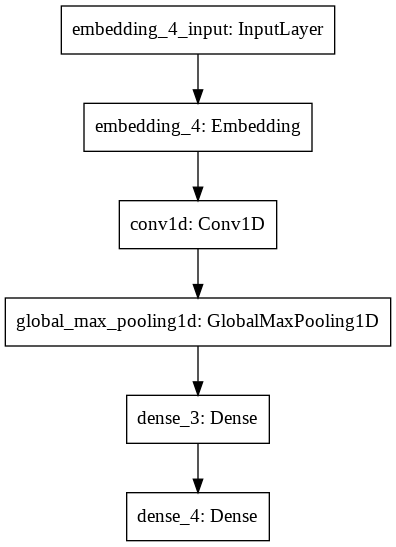

In [ ]:
tf.keras.utils.plot_model(CNN)

In [ ]:
historyCNN = CNN.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 10, batch_size = 60, verbose = 1)

Epoch 1/10
696/696 [==============================] - 35s 8ms/step - loss: 0.2691 - accuracy: 0.8831 - val_loss: 0.1019 - val_accuracy: 0.9740
Epoch 2/10
696/696 [==============================] - 6s 8ms/step - loss: 0.1436 - accuracy: 0.9442 - val_loss: 0.1056 - val_accuracy: 0.9703
Epoch 3/10
696/696 [==============================] - 6s 8ms/step - loss: 0.1110 - accuracy: 0.9575 - val_loss: 0.1465 - val_accuracy: 0.9565
Epoch 4/10
696/696 [==============================] - 6s 8ms/step - loss: 0.0888 - accuracy: 0.9658 - val_loss: 0.1418 - val_accuracy: 0.9278
Epoch 5/10
696/696 [==============================] - 5s 8ms/step - loss: 0.0739 - accuracy: 0.9715 - val_loss: 0.1806 - val_accuracy: 0.9176
Epoch 6/10
696/696 [==============================] - 5s 8ms/step - loss: 0.0615 - accuracy: 0.9766 - val_loss: 0.1376 - val_accuracy: 0.9664
Epoch 7/10
696/696 [==============================] - 6s 8ms/step - loss: 0.0518 - accuracy: 0.9806 - val_loss: 0.1532 - val_accuracy: 0.9337
Epoch

### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**



In [ ]:
score = CNN.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)


290/290 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.9215
Accuracy: % 92.15495586395264


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred1= CNN.predict(X_test)
y_pred1= np.round(y_pred1)

print(roc_auc_score(y_test,y_pred1))

0.9547679637503758


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8955
           1       0.30      0.99      0.46       312

    accuracy                           0.92      9267
   macro avg       0.65      0.95      0.71      9267
weighted avg       0.98      0.92      0.94      9267



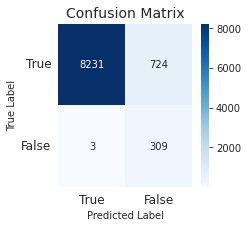

True Positive: 8231
True Negative: 309
False Positive: 724
False Negative: 3


In [ ]:
y_pred = CNN.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

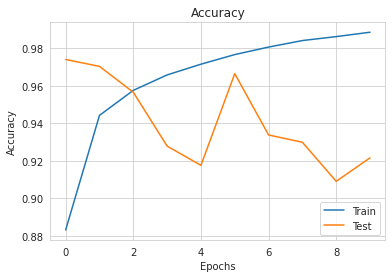

In [ ]:
plt.figure()
plt.plot(historyCNN.history["accuracy"], label = "Train")
plt.plot(historyCNN.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

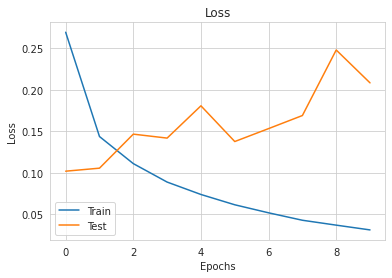

In [ ]:
plt.figure()
plt.plot(historyCNN.history["loss"], label = "Train")
plt.plot(historyCNN.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
pred = CNN.predict(test_data_seq, verbose=1)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_CNN.csv', index=False)

640/640 [==============================] - 1s 2ms/step


### **Hyperparamter tuning for CNN model**

changing the batch size, epochs, adding flatten layer, drop pout layer

In [ ]:
from keras.layers import Dense, Activation, Flatten
embedding_dim = 50
# 5 filters are there
CNN_tuned = Sequential()    # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 450 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
# CNN.add(layers.Embedding(input_dim=vocab_size, 
#                            output_dim=embedding_dim, 
#                            input_length=maxlen))
# CNN.add(Conv1D(32, 3, padding='same', activation='relu'))
# CNN.add(MaxPooling1D())
# CNN.add(Flatten())
# CNN.add(Dense(250, activation='relu'))
# CNN.add(Dense(1, activation='sigmoid'))

CNN_tuned.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
CNN_tuned.add(Dropout(0.4))
CNN_tuned.add(layers.Conv1D(embedding_dim, 5, activation='relu'))
model.add(Dropout(0.4))
CNN_tuned.add(layers.GlobalMaxPooling1D())
CNN_tuned.add(layers.Dense(10, activation='relu'))
CNN_tuned.add(Flatten())
CNN_tuned.add(layers.Dense(1, activation='sigmoid'))
CNN_tuned.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
CNN_tuned.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           236850    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 50)            12550     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

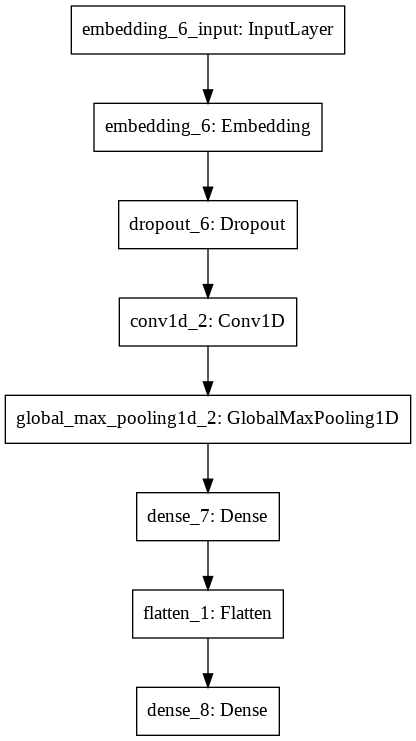

In [ ]:
tf.keras.utils.plot_model(CNN_tuned)

In [ ]:
CNN_tuned_history = CNN_tuned.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 15, batch_size = 128, verbose = 1)

Epoch 1/15
327/327 [==============================] - 4s 10ms/step - loss: 0.3727 - accuracy: 0.8298 - val_loss: 0.2043 - val_accuracy: 0.9296
Epoch 2/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1936 - accuracy: 0.9200 - val_loss: 0.1641 - val_accuracy: 0.9444
Epoch 3/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1603 - accuracy: 0.9378 - val_loss: 0.1593 - val_accuracy: 0.9457
Epoch 4/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1423 - accuracy: 0.9469 - val_loss: 0.1296 - val_accuracy: 0.9648
Epoch 5/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1307 - accuracy: 0.9526 - val_loss: 0.1737 - val_accuracy: 0.9455
Epoch 6/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1220 - accuracy: 0.9565 - val_loss: 0.1867 - val_accuracy: 0.9415
Epoch 7/15
327/327 [==============================] - 3s 9ms/step - loss: 0.1147 - accuracy: 0.9586 - val_loss: 0.2180 - val_accuracy: 0.9348
Epoch

### **Evaluating Performance metrics (accuracy, f1 score and roc auc curve)**


In [ ]:
score = CNN_tuned.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)

290/290 [==============================] - 1s 3ms/step - loss: 0.2124 - accuracy: 0.9460
Accuracy: % 94.60451006889343


In [ ]:
 from sklearn.metrics import roc_auc_score

y_pred1= CNN_tuned.predict(X_test)
y_pred1= np.round(y_pred1)

print(roc_auc_score(y_test,y_pred1))

0.9689891766524932


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8955
           1       0.38      0.99      0.55       312

    accuracy                           0.95      9267
   macro avg       0.69      0.97      0.76      9267
weighted avg       0.98      0.95      0.96      9267



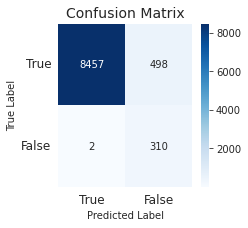

True Positive: 8457
True Negative: 310
False Positive: 498
False Negative: 2


In [ ]:
y_pred = CNN_tuned.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)

df1 = pd.DataFrame(columns=["True","False"], index= ["True","False"], data= cm ) 

f,ax = plt.subplots(figsize=(3,3))
sns.heatmap(df1, annot=True,cmap="Blues", fmt= '.0f',ax=ax)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

print ("True Positive:" , (cm[0,0]))
print ("True Negative:" , (cm[1,1]))
print ("False Positive:" , (cm[0,1]))
print ("False Negative:" , (cm[1,0]))

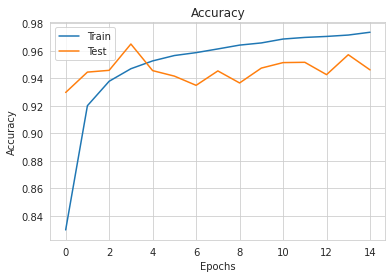

In [ ]:
plt.figure()
plt.plot(CNN_tuned_history.history["accuracy"], label = "Train")
plt.plot(CNN_tuned_history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

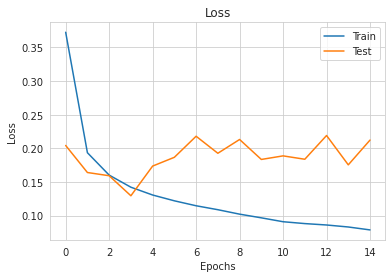

In [ ]:
plt.figure()
plt.plot(CNN_tuned_history.history["loss"], label = "Train")
plt.plot(CNN_tuned_history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend() 
plt.show()

In [ ]:
pred = CNN_tuned.predict(test_data_seq, verbose=1)
df_test['test_skill_label'] = np.round(pred).astype(int)
df_test[['Default_index', 'testing_noun_phrases','test_skill_label']].to_csv('submission_CNN_tuned.csv', index=False)

640/640 [==============================] - 1s 2ms/step
